In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [6]:
! pwd

/cygdrive/c/Users/harel/PycharmProjects/Anti_Cp/Code


In [7]:
data_1 = TabularDataset(r'..\dataset\Dataset_AutoML.csv').drop(['Sequence'],axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333,0.333,0.333,0.180164,0.267333,0.46,0.81,4,11.85,...,33.333,40.000,20.000,20.000,53.333,46.667,33.333,33.333,0.000,2
1,16,0.688,0.188,0.562,0.526107,0.426250,1.28,-0.34,5,11.28,...,31.250,37.500,56.250,6.250,62.500,37.500,31.250,31.250,0.000,1
2,13,0.538,0.231,0.615,0.846486,0.315385,2.61,0.44,4,11.87,...,0.000,15.385,30.769,15.385,46.154,53.846,46.154,38.462,7.692,2
3,12,0.500,0.083,0.333,0.782014,0.192500,2.61,0.71,4,11.87,...,0.000,16.667,33.333,8.333,41.667,58.333,50.000,41.667,8.333,2
4,17,0.529,0.176,0.294,0.771108,0.377647,2.36,0.09,4,11.88,...,5.882,29.412,35.294,11.765,52.941,47.059,35.294,29.412,5.882,2


 HArel shuffle

In [8]:
# Add shuffle!

data_1['Label'] = data_1['Label'].sample(frac=1).reset_index(drop=True)

# BorderlineSMOTE

In [9]:
Feature=pd.DataFrame(data_1.drop(['Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

In [10]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333000,0.333000,0.333000,0.180164,0.267333,0.460000,0.810000,4,11.850000,...,33.333000,40.000000,20.000000,20.000000,53.333000,46.667000,33.333000,33.333000,0.000000,1
1,16,0.688000,0.188000,0.562000,0.526107,0.426250,1.280000,-0.340000,5,11.280000,...,31.250000,37.500000,56.250000,6.250000,62.500000,37.500000,31.250000,31.250000,0.000000,1
2,13,0.538000,0.231000,0.615000,0.846486,0.315385,2.610000,0.440000,4,11.870000,...,0.000000,15.385000,30.769000,15.385000,46.154000,53.846000,46.154000,38.462000,7.692000,2
3,12,0.500000,0.083000,0.333000,0.782014,0.192500,2.610000,0.710000,4,11.870000,...,0.000000,16.667000,33.333000,8.333000,41.667000,58.333000,50.000000,41.667000,8.333000,3
4,17,0.529000,0.176000,0.294000,0.771108,0.377647,2.360000,0.090000,4,11.880000,...,5.882000,29.412000,35.294000,11.765000,52.941000,47.059000,35.294000,29.412000,5.882000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,15,0.567713,0.434897,0.295161,0.464604,0.606598,1.650525,0.775106,5,12.183007,...,12.625244,24.248237,25.250638,25.250638,61.121718,38.878282,32.565585,32.565585,0.000000,3
2129,10,0.647459,0.156265,0.545552,0.170253,0.756220,0.556996,1.096750,3,11.929542,...,11.272766,11.272766,7.275002,42.180765,67.636852,32.363148,32.363148,32.363148,0.000000,3
2130,15,0.369814,0.513218,0.303264,0.333355,0.174557,1.093516,0.945381,0,8.246834,...,16.336778,29.670327,23.663222,13.333000,36.996222,63.003778,43.003778,26.667000,16.336778,3
2131,16,0.188000,0.475718,0.233855,0.346216,-0.028804,1.213249,2.309374,8,12.880000,...,0.000000,36.692754,12.500000,0.000000,49.192754,50.807246,50.807246,50.807246,0.000000,3


In [11]:
data=smo

# AutoGluon

In [12]:
train_data,test_data=train_test_split(data, test_size=0.2,random_state=0)
train_data.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
1018,17,0.471,0.529,0.529,0.492396,0.392353,1.63,-0.22,0,5.69,...,35.294,64.706,41.176,0.000,58.824,41.176,11.765,5.882,5.882,2
634,12,0.667,0.667,0.250,0.432947,0.515000,1.28,-0.22,5,12.58,...,0.000,25.000,50.000,8.333,58.333,41.667,41.667,41.667,0.000,2
486,13,0.231,0.077,0.615,0.422325,0.080000,1.51,2.05,6,12.80,...,0.000,38.462,15.385,0.000,53.846,46.154,46.154,46.154,0.000,3
1344,16,0.375,0.688,0.188,0.557431,0.007500,1.56,1.62,5,12.13,...,25.000,50.000,18.750,12.500,43.750,56.250,43.750,37.500,6.250,1
521,11,0.636,0.636,0.364,0.488118,0.790000,1.95,-0.37,3,11.10,...,9.091,18.182,36.364,18.182,72.727,27.273,27.273,27.273,0.000,1


In [13]:
label='Label'
print("Summary of antisa activity coulum: \n", train_data['Label'].describe())
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    1706.000000
mean        1.983587
std         0.815373
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64
Summary of antisa activity coulum: 
 count    427.000000
mean       2.065574
std        0.819601
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [17]:
'a'

'a'

In [16]:
save_path = 'anticp_shuffled'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=10, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       1.83 GB / 15.78 GB (11.6%)
Disk Space Avail:   165.10 GB / 475.83 GB (34.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up 

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMXT_BAG_L2   0.627784    accuracy      15.808498  1632.241017                0.722092         101.538856            2       True         14
1       WeightedEnsemble_L3   0.627784    accuracy      15.811499  1634.093080                0.003001           1.852062            3       True         22
2           LightGBM_BAG_L2   0.615475    accuracy      15.728957  1700.459805                0.642552         169.757643            2       True         15
3            XGBoost_BAG_L2   0.586166    accuracy      15.227334  1558.945719                0.140928          28.243557            2       True         21
4    NeuralNetFastAI_BAG_L2   0.584994    accuracy      18.211476  1639.352467                3.125071         108.650306            2       True        

C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [18]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
1968,13,0.414108,0.193679,0.427139,0.410431,0.337816,1.49554,0.787175,1,10.311828,...,-0.347016,8.620408,34.051994,25.431587,25.431587,42.672402,57.327598,30.602513,30.602513,0.000
379,15,0.533000,0.600000,0.533000,0.319952,0.597333,1.03000,-0.240000,3,11.560000,...,-0.226667,13.333000,33.333000,26.667000,20.000000,60.000000,40.000000,20.000000,20.000000,0.000
689,12,0.833000,0.083000,0.583000,0.293332,0.720000,1.09000,-1.110000,3,11.800000,...,-0.101667,25.000000,50.000000,58.333000,8.333000,75.000000,25.000000,25.000000,25.000000,0.000
935,13,0.615000,0.692000,0.231000,0.099480,0.663077,0.18000,0.640000,5,12.180000,...,0.050769,7.692000,7.692000,30.769000,23.077000,53.846000,46.154000,38.462000,38.462000,0.000
252,18,0.278000,0.222000,0.444000,0.370852,-0.024444,1.08000,1.420000,-2,3.980000,...,-0.401111,22.222000,50.000000,5.556000,16.667000,44.444000,55.556000,44.444000,16.667000,27.778


In [19]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Predictions: 
 1968    3
379     1
689     1
935     1
252     2
       ..
666     1
459     1
596     3
376     3
1257    1
Name: Label, Length: 427, dtype: int64
GT: 
 1968    3
379     1
689     1
935     1
252     3
       ..
666     3
459     1
596     1
376     1
1257    3
Name: Label, Length: 427, dtype: int64


In [20]:
res_leaderboard=predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)
res_leaderboard

,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,...,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L2,0.580796,0.580796,0.586353,0.580796,0.741044,0.612466,0.580796,0.583538,0.580796,...,accuracy,5.468907,15.227334,1558.945719,0.610690,0.140928,28.243557,2,True,21
1,ExtraTreesEntr_BAG_L2,0.576112,0.576112,0.578980,0.576112,0.733590,0.595007,0.576112,0.578077,0.576112,...,accuracy,5.151317,15.596687,1532.752986,0.293099,0.510281,2.050825,2,True,20
2,RandomForestEntr_BAG_L2,0.566745,0.566745,0.570169,0.566745,0.733721,0.587838,0.566745,0.568607,0.566745,...,accuracy,5.093965,17.271695,1545.023119,0.235747,2.185289,14.320957,2,True,17
3,CatBoost_BAG_L2,0.562061,0.562061,0.567665,0.562061,0.748975,0.604387,0.562061,0.565262,0.562061,...,accuracy,4.987331,15.225405,1805.643141,0.129114,0.138999,274.940980,2,True,18
4,ExtraTreesGini_BAG_L2,0.562061,0.562061,0.565296,0.562061,0.733944,0.582787,0.562061,0.565131,0.562061,...,accuracy,5.215844,15.736883,1532.947996,0.357627,0.650477,2.245835,2,True,19
5,LightGBM_BAG_L2,0.559719,0.559719,0.563278,0.559719,0.747475,0.583938,0.559719,0.561867,0.559719,...,accuracy,5.408786,15.728957,1700.459805,0.550569,0.642552,169.757643,2,True,15
6,LightGBMXT_BAG_L2,0.559719,0.559719,0.561918,0.559719,0.738097,0.572472,0.559719,0.560417,0.559719,...,accuracy,5.944982,15.808498,1632.241017,1.086765,0.722092,101.538856,2,True,14
7,WeightedEnsemble_L3,0.559719,0.559719,0.561918,0.559719,0.738097,0.572472,0.559719,0.560417,0.559719,...,accuracy,5.944982,15.811499,1634.093080,0.000000,0.003001,1.852062,3,True,22
8,RandomForestGini_BAG_L2,0.557377,0.557377,0.560496,0.557377,0.733569,0.579532,0.557377,0.560046,0.557377,...,accuracy,5.111161,16.001970,1537.196323,0.252943,0.915564,6.494161,2,True,16
9,KNeighborsDist_BAG_L1,0.543326,0.543326,0.531907,0.543326,0.685278,0.532601,0.543326,0.537339,0.543326,...,accuracy,0.016044,5.035310,0.148381,0.016044,5.035310,0.148381,1,True,2


In [21]:
model_best=predictor.get_model_best()
model_best

C:\Users\harel\AppData\Local\Temp\ipykernel_19144\3413965928.py:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  model_best=predictor.get_model_best()


'WeightedEnsemble_L3'

In [22]:
predictor.get_model_names()

C:\Users\harel\AppData\Local\Temp\ipykernel_19144\107866492.py:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'XGBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'NeuralNetFastAI_BAG_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestGini_BAG_L2',
 'RandomForestEntr_BAG_L2',
 'CatBoost_BAG_L2',
 'ExtraTreesGini_BAG_L2',
 'ExtraTreesEntr_BAG_L2',
 'XGBoost_BAG_L2',
 'WeightedEnsemble_L3']

In [23]:
specific_model = predictor._trainer.load_model(model_best)
model_info = specific_model.get_info()
model_info

{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'multiclass',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 1.852062463760376,
 'num_classes': 3,
 'quantile_levels': None,
 'predict_time': 0.0030012130737304688,
 'val_score': 0.6277842907385698,
 'hyperparameters': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': False},
 'num_features': 3,
 'features': ['LightGBMXT_BAG_L2_2',
  '

In [24]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

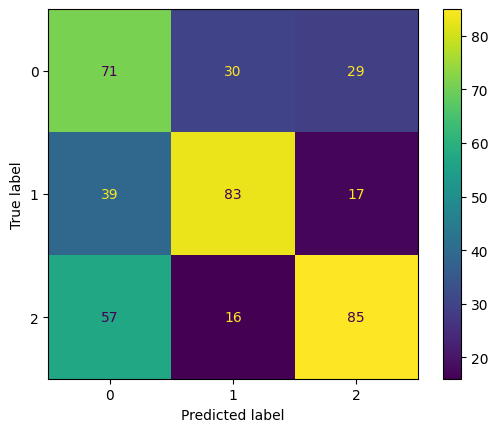

In [26]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [27]:
y_probas=predictor.predict_proba(test_data_nolab)

C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


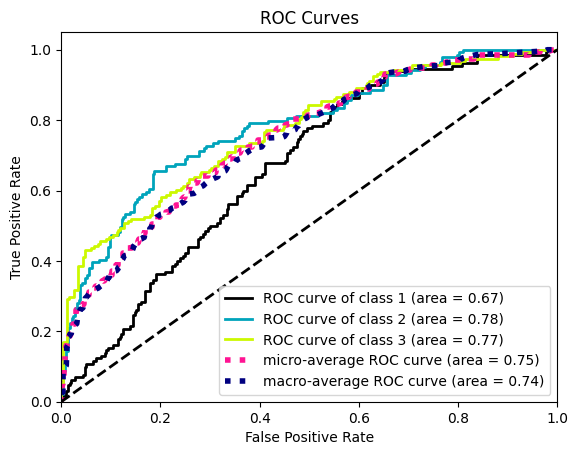

In [28]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)

plt.savefig("fig2_shuffled.pdf")
plt.show()

In [ ]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

In [ ]:
importance.to_csv('importance.csv',sep=',',index=True,header=True)

In [ ]:
res_leaderboard.to_csv('res_leaderboard.csv',sep=',',index=True,header=True)